# PHC Prediciton SVM

### Importing The Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import seaborn as sns


### Data Collection and Analysis

#### PHS health dataset

In [2]:
df = pd.read_csv('dataset/cleaned_data.csv', index_col=0)

In [3]:
df.head()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status,bmi,wh
0,59,1,0,0,0,0,0,0,1,0,...,78,234.0,NaN,0,0,94,4.3,3,20.85,1.06
1,60,1,1,1,0,1,0,0,0,1,...,67,93.6,NaN,0,0,62,5.8,2,27.48,0.96
2,58,1,1,1,1,1,0,0,0,1,...,81,133.2,NaN,0,0,60,7.0,3,31.12,0.99
3,50,2,1,0,0,1,1,0,0,0,...,65,75.6,10.9,0,0,82,3.6,2,22.05,0.85
4,56,1,1,0,0,1,0,0,0,1,...,98,223.2,NaN,0,0,92,5.0,3,25.35,0.96


#### Number of Rows and Columns of the dataset

In [4]:
print(f'Row={df.shape[0]}, Column={df.shape[1]}')

Row=50, Column=28


#### Analysing the data

In [5]:
# get statistical measures of this dataframe
df.describe()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,health_status,bmi,wh
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,...,50.000000,50.000000,7.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,53.960000,1.14000,0.740000,0.900000,0.460000,0.420000,0.10000,0.14000,0.020000,0.580000,...,80.980000,136.008000,10.871429,0.020000,0.020000,77.200000,6.596000,3.000000,25.565800,0.956200
std,4.840138,0.35051,0.443087,1.092647,0.613122,0.498569,0.46291,0.35051,0.141421,0.784805,...,8.077406,52.033364,0.692133,0.141421,0.141421,12.480188,1.624551,0.832993,3.062229,0.067063
min,36.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,65.000000,70.200000,9.800000,0.000000,0.000000,56.000000,3.600000,1.000000,19.790000,0.640000
25%,50.500000,1.00000,0.250000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,75.000000,92.250000,10.600000,0.000000,0.000000,67.500000,5.500000,2.250000,23.400000,0.940000
50%,55.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,82.000000,123.300000,10.900000,0.000000,0.000000,76.000000,6.800000,3.000000,25.155000,0.960000
75%,58.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,0.00000,0.000000,1.000000,...,84.000000,174.600000,11.050000,0.000000,0.000000,88.000000,7.825000,4.000000,26.980000,0.990000
max,60.000000,2.00000,1.000000,3.000000,3.000000,1.000000,3.00000,1.00000,1.000000,3.000000,...,105.000000,257.400000,12.100000,1.000000,1.000000,105.000000,10.700000,4.000000,33.720000,1.060000


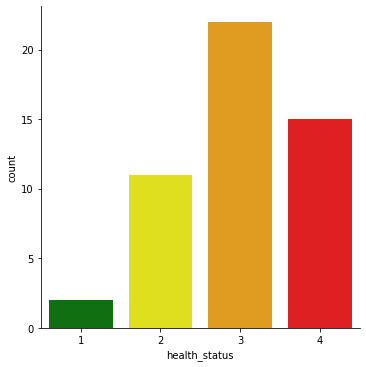

In [6]:
# number of values for each values
sns.catplot(x='health_status', data=df, kind = 'count', palette={1:"green", 2:"yellow", 3:'orange', 4:'red'})

1 --> Green

2 --> Yellow

3 --> Orange

4 --> Red

In [7]:
df.groupby('health_status').mean()

,age,gender,limit_diet,gain_10kg,gain_lose_3kg,eat_2h_sleep,soft_drink,fast_food,skip_breakfast,eat_faster,...,bp_sys,bp_dia,blood_glucose,blood_hemoglobin,urinary_glucose,urinary_protein,pulse_rate,uric_acid,bmi,wh
health_status,,,,,,,,,,,,,,,,,,,,,
1,43.000000,1.000000,0.500000,1.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,...,122.000000,82.000000,108.000000,NaN,0.000000,0.000000,66.000000,5.000000,23.145000,0.880000
2,53.818182,1.090909,0.818182,0.818182,0.272727,0.272727,0.090909,0.090909,0.000000,0.363636,...,122.000000,76.363636,114.709091,10.9,0.000000,0.000000,84.727273,5.600000,25.058182,0.960909
3,55.636364,1.090909,0.772727,0.772727,0.409091,0.454545,0.000000,0.045455,0.045455,0.545455,...,133.727273,82.272727,150.872727,10.8,0.045455,0.045455,78.181818,6.018182,25.474545,0.960455
4,53.066667,1.266667,0.666667,1.066667,0.666667,0.466667,0.266667,0.333333,0.000000,0.866667,...,129.066667,82.333333,133.560000,10.9,0.000000,0.000000,71.733333,8.386667,26.394667,0.956667


In [8]:
# seperating data and labels
data = df.drop(['health_status', 'blood_hemoglobin'], axis=1)
label = df.health_status

### Data Standardization

In [9]:
# importing scaler and fitting data
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [10]:
# transforming data into standardized values (values of same range)
data = scaler.transform(data)

### Training and Testing Data Split

In [11]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, stratify=label, random_state=1)

In [12]:
print(data.shape ,data_train.shape, data_test.shape)

(50, 26) (40, 26) (10, 26)


### Training The Model

In [13]:
# loading model
classifier = svm.SVC(kernel = 'linear')

In [14]:
# training the SVM Classifier

classifier.fit(data_train, label_train)

SVC(kernel='linear')

### Model Evaluation

#### Finding the accuracy score

In [15]:
# accuracy score on the training data
data_train_prediction = classifier.predict(data_train)
data_train_accuracy = accuracy_score(data_train_prediction, label_train)
print(data_train_accuracy)

1.0


In [16]:
# accuracy score on the testing data
data_test_prediction = classifier.predict(data_test)
data_test_accuracy = accuracy_score(data_test_prediction, label_test)
print(data_test_accuracy*100)

80.0


### Making Predictive System

In [17]:
# input_data = (-0.65831098, -0.40905835,  2.4784788 ,  0.59274898, -0.83205029,
#         0.88968025, -0.85096294, -0.21821789,  2.4784788 , -0.14285714,
#        -0.74654051,  1.23812892,  0.33333333, -0.81415234,  0.32539569,
#         0.63599873, -0.57206323,  0.11299412, -1.14203056, -0.44492793,
#        -0.62279395, -0.92812321, -0.14285714, -0.14285714, -0.09712859,
#         2.55188353, -0.97834288)

# # changing the input_data to numpy array
# input_to_numpy = np.asarray(input_data)

# # reshaping input_to_numpy 
# input_reshaped = input_to_numpy.reshape(1, -1)

# #standardize the input_data
# std_data = scaler.transform(input_reshaped)
# print(std_data)

In [18]:
# #prediction

# prediction = classifier.predict(std_data)
# if(prediction[0] == 1):
#     print('Green')
    
# elif(prediction[0] == 2):
#     print('Yellow')
    
# elif(prediction[0] == 3):
#     print('Orange')

# else:
#     print('Red')
    
# print(prediction)